In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
from matplotlib.colors import ListedColormap
# make the texts in figures editable
new_rc_params = {'text.usetex': False,
                 "svg.fonttype": 'none'
                 }
matplotlib.rcParams.update(new_rc_params)

In [5]:
def to_undirected_sum_viz(G, weight='flow'):
    """
    convert directed graph to the undirected and sum the attribute,
    nx.to_undirected function only use the edge attribute with the max value
    """
    UG = G.to_undirected()
    for node in G:
        for ngbr in nx.neighbors(G, node):
            if node in nx.neighbors(G, ngbr):
                UG.edges[node, ngbr][weight] = (
                        G.edges[node, ngbr][weight] + G.edges[ngbr, node][weight]
                )
    return UG

with open('./tmp_results/tmp_parameters_mumford3_GCH_viz.pkl', 'rb') as f:
    params = pickle.load(f)
    
coms_leiden, df_exclude_ls, df_each_level_ls, average_weighted_modularity = params[0],params[1],params[2],params[3]
route_set_df = pd.read_csv('./tmp_results/coms_optimized_routes_mumford3_63.19.csv')
df_nodes = pd.read_csv('./data/mumford3_nodes.txt')

In [6]:
grouped = route_set_df.groupby('new_route')
route_path_df = pd.DataFrame([[x,grouped.get_group(x).station_name.values] for x in grouped.groups], columns=['com_id','path'])
del grouped
route_path_df[['level', 'com_id','route_id']] =  route_path_df.com_id.str.split('_',expand=True)
route_path_df['color'] = None

In [7]:
cmap_1 = list(matplotlib.cm.get_cmap('tab20c').colors[:13])
cmap_2 = list(matplotlib.cm.get_cmap('tab20b').colors[:])
# del cmap_1[3::4]
# del cmap_2[3::4]
cmap = ListedColormap(np.vstack([cmap_1,
                                 cmap_2]),
                      name='tab36')

D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

Number of nodes not in any cluster: 62
level 0 cluster 2 has 24 nodes
level 0 cluster 3 has 22 nodes
level 0 cluster 4 has 19 nodes


D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if yo

Number of nodes not in any cluster: 0
level 1 cluster 0 has 26 nodes
level 1 cluster 1 has 24 nodes
level 1 cluster 2 has 24 nodes
level 1 cluster 3 has 21 nodes
level 1 cluster 4 has 17 nodes
level 1 cluster 5 has 15 nodes


D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if yo

Number of nodes not in any cluster: 0
level 2 cluster 0 has 32 nodes
level 2 cluster 1 has 30 nodes
level 2 cluster 2 has 26 nodes
level 2 cluster 3 has 21 nodes
level 2 cluster 4 has 18 nodes


D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if yo

Number of nodes not in any cluster: 0
level 3 cluster 0 has 30 nodes
level 3 cluster 1 has 26 nodes
level 3 cluster 2 has 24 nodes
level 3 cluster 3 has 24 nodes
level 3 cluster 4 has 23 nodes
Number of nodes not in any cluster: 9


D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

level 4 cluster 0 has 35 nodes
level 4 cluster 1 has 34 nodes
level 4 cluster 2 has 25 nodes
level 4 cluster 3 has 24 nodes


D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if yo

Number of nodes not in any cluster: 0
level 5 cluster 0 has 30 nodes
level 5 cluster 1 has 29 nodes
level 5 cluster 2 has 27 nodes
level 5 cluster 3 has 25 nodes
level 5 cluster 4 has 16 nodes
Number of nodes not in any cluster: 0
level 6 cluster 0 has 29 nodes
level 6 cluster 1 has 26 nodes
level 6 cluster 2 has 25 nodes
level 6 cluster 3 has 25 nodes
level 6 cluster 4 has 22 nodes
Number of nodes not in any cluster: 19


D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

level 7 cluster 0 has 30 nodes
level 7 cluster 1 has 22 nodes
level 7 cluster 2 has 22 nodes
level 7 cluster 3 has 17 nodes
level 7 cluster 4 has 17 nodes
Number of nodes not in any cluster: 11
level 8 cluster 0 has 23 nodes
level 8 cluster 1 has 22 nodes
level 8 cluster 2 has 20 nodes
level 8 cluster 3 has 18 nodes
level 8 cluster 4 has 17 nodes
level 8 cluster 5 has 16 nodes
Number of nodes not in any cluster: 28
level 9 cluster 0 has 23 nodes
level 9 cluster 1 has 19 nodes
level 9 cluster 2 has 15 nodes
level 9 cluster 3 has 15 nodes
level 9 cluster 4 has 14 nodes
level 9 cluster 5 has 13 nodes


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, n

Number of nodes not in any cluster: 0
level 10 cluster 0 has 27 nodes
level 10 cluster 1 has 18 nodes
level 10 cluster 2 has 16 nodes
level 10 cluster 3 has 16 nodes
level 10 cluster 4 has 15 nodes
level 10 cluster 5 has 15 nodes
level 10 cluster 6 has 13 nodes


IndexError: list index out of range

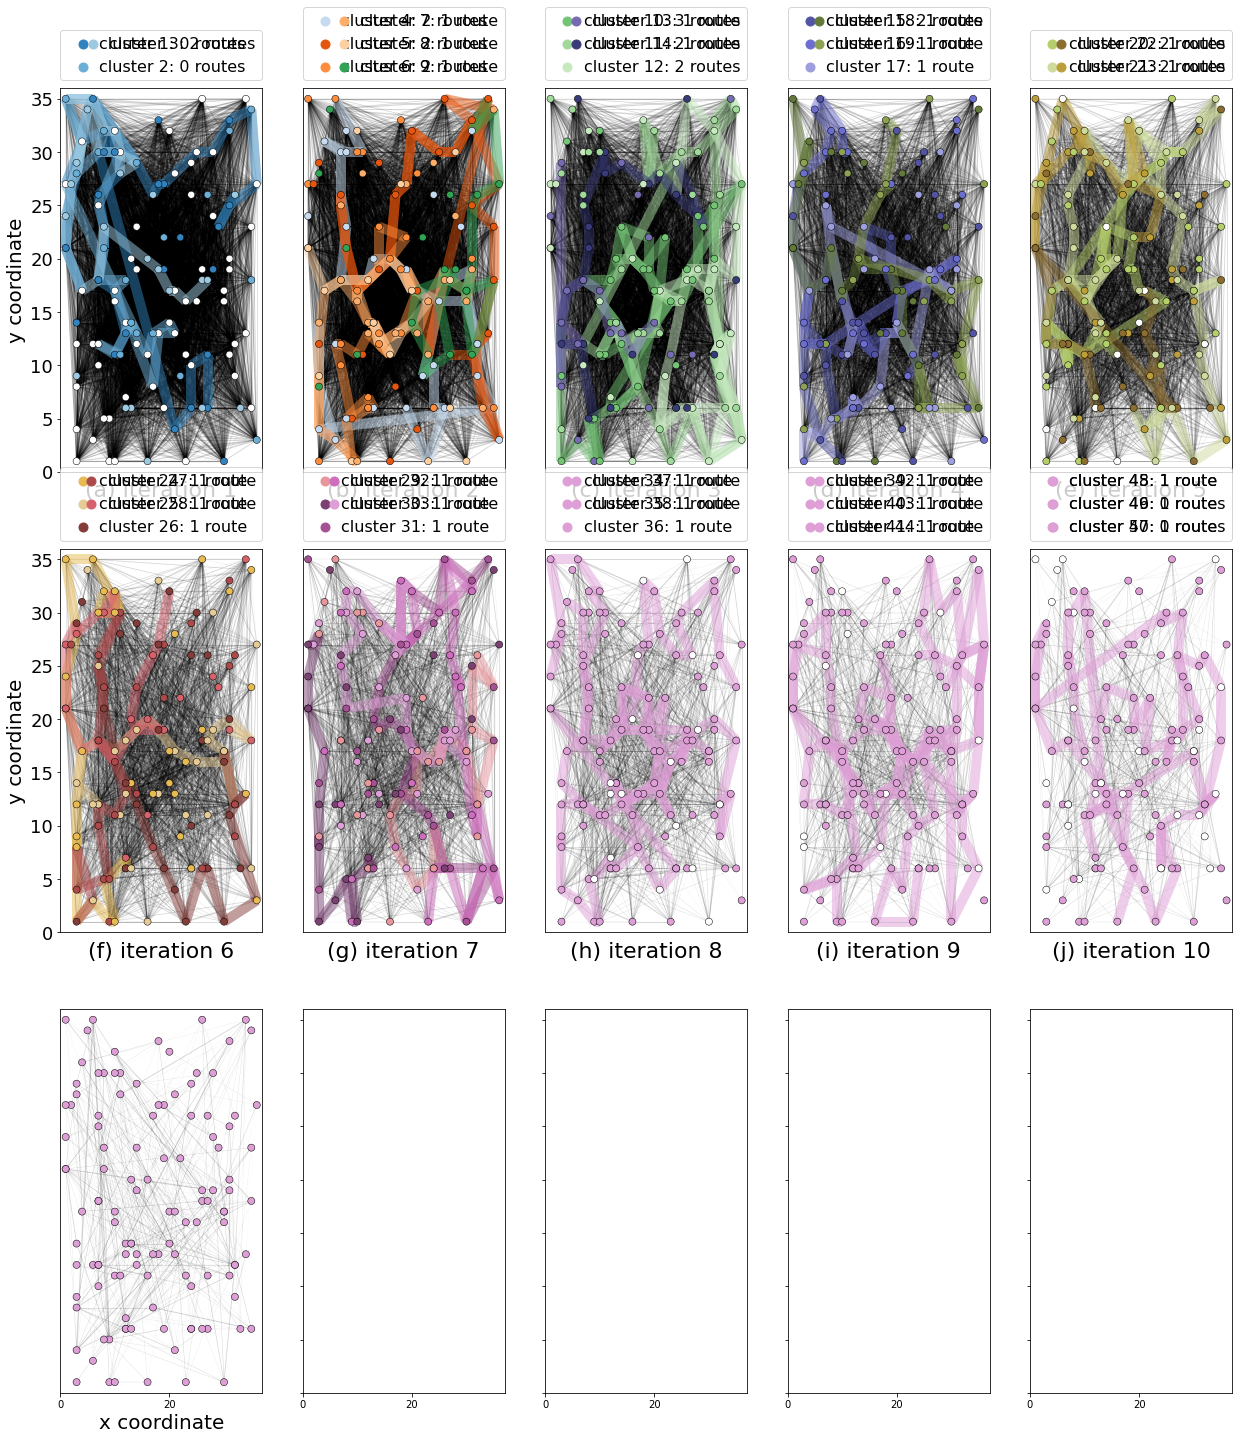

In [8]:
# the visualization is limited to three layers of clusters (yielded from three iterations of graph clustering procedure)
# rendering all clusters would make the figrue too complicated.

# fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
color_id = 0
com_id_viz = 1
row_num = 3
ticks_size = 18
label_size = 20
title_size = 22
legend_font_size = 16
col_num = int((coms_leiden.level.max() + 1) / row_num)
fig, ax = plt.subplots(row_num, col_num, sharex='col', sharey='row', squeeze=False, figsize=(21, 24))
alphe_ls = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
for k in range(row_num):
    for p in range(col_num):
        i = k * col_num + p

        df_nodes = pd.read_csv('./data/mumford3_nodes.txt')
        max_lat = df_nodes.lat.max()
        max_lon = df_nodes.lon.max()
        df_od_each_level = df_each_level_ls[i]
        # first read the list of bus stop with coordinates
        G = nx.from_pandas_edgelist(df_od_each_level, source='o_station_name',
                                    target='d_station_name',
                                    edge_attr=['flow'], create_using=nx.DiGraph)

        # the coordinates is flipped to make sure the figure is consistent
        # with https://github.com/RenatoArbex/TransitNetworkDesign/tree/master/Mumford/Mumford3
        stop_ls_layer = gpd.GeoDataFrame(
            df_nodes, geometry=gpd.points_from_xy(df_nodes.lat, df_nodes.lon))

        stop_ls_layer.set_index('id', inplace=True)

        pos_ori = {index: list(value.coords)[0] for index, value in
                   stop_ls_layer.geometry.items()}
        nx.set_node_attributes(G, pos_ori, 'coord')

        # have to transfer to undirected graph for fetching connected components in the graph
        # threshold = 3
        # G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="Count") if w < threshold])
        G = to_undirected_sum_viz(G)

        nodes = list(G.nodes())
        df_nodes = df_nodes[df_nodes.id.isin(nodes)]

        # get clusters of each layer
        each_coms_leiden = coms_leiden[coms_leiden.level == i]
        curr_route_path_df = route_path_df[route_path_df.level == str(i)]

        # find a list of assigned stops in the current level
        all_assigned = np.concatenate(each_coms_leiden.community.values)
        each_cluster_not_df = df_nodes[~df_nodes.id.isin(all_assigned)]
        print('Number of nodes not in any cluster: {}'.format(len(each_cluster_not_df)))
        if len(each_cluster_not_df) > 0:
            # assign grey color to pop-out nodes in each level of clustering (each iteration of leiden)
            for index, row in each_cluster_not_df.iterrows():
                G.nodes[row['id']]['color'] = 'white'

        legend_colors = []
        for _, each_cluster_row in each_coms_leiden.iterrows():
            tmp_com_id = each_cluster_row.membership
            print('level {} cluster {} has {} nodes'.format(i, tmp_com_id,
                                                            len(each_cluster_row.community)))
            tmp_index = curr_route_path_df[
                (curr_route_path_df.com_id == str(tmp_com_id))].index
            curr_route_path_df.loc[tmp_index, 'color'] = [cmap(color_id)] * len(tmp_index)
            for each_node_id in each_cluster_row.community:
                G.nodes[each_node_id]['color'] = cmap(color_id)

            legend_colors.append(cmap(color_id))

            color_id += 1

        # Plot network
        weights = list(map(lambda x: x[-1]['flow'], G.edges(data=True)))
        colors = [nx.get_node_attributes(G, 'color')[v] for v in G]

        node_layer = nx.draw_networkx_nodes(G, pos=pos_ori, node_color=colors,
                                            ax=ax[k, p],
                                            node_size=50, edgecolors="black",
                                            linewidths=.5)
        node_layer.set_zorder(10)

        # make empty plot with correct color and label for each group
        tmp_com_id = 0
        for v in legend_colors:
            com_route_path_df = curr_route_path_df[
                curr_route_path_df.com_id == str(tmp_com_id)]
            if len(com_route_path_df) == 1:
                ax[k, p].scatter([], [], c=v,
                                 label='cluster {}: {} route'.format(com_id_viz,
                                                                     len(com_route_path_df)))
            else:
                ax[k, p].scatter([], [], c=v,
                                 label='cluster {}: {} routes'.format(com_id_viz,
                                                                      len(com_route_path_df)))
            com_id_viz += 1
            tmp_com_id += 1

        edge_layer = nx.draw_networkx_edges(G, pos=pos_ori,
                                            width=np.array(weights) / 1000, alpha=0.1618,
                                            ax=ax[k, p])
        if len(curr_route_path_df) > 0:
            G_path = nx.Graph()
            routes = curr_route_path_df.path.values
            edges_path = []
            for r in routes:
                route_edges = [(r[n], r[n + 1]) for n in range(len(r) - 1)]
                G_path.add_nodes_from(r)
                G_path.add_edges_from(route_edges)
                edges_path.append(route_edges)
            path_colors = curr_route_path_df.color.values
            nx.set_node_attributes(G_path, pos_ori, 'coord')

            for ctr, edgelist in enumerate(edges_path):
                nx.draw_networkx_edges(G_path, pos=pos_ori, edgelist=edgelist,
                                       ax=ax[k, p],
                                       edge_color=path_colors[ctr], width=10, alpha=0.5)

        edge_layer.set_rasterized(True)
        # ax[k,p].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

        ax[k, p].set_ylim(0, max_lon + 1)
        ax[k, p].set_xlim(0, max_lat + 1)
        if k == row_num - 1:
            ax[k, p].set_xlabel('x coordinate', fontsize=label_size)
            ax[k, p].tick_params(bottom=True, labelbottom=True)
            ax[k, p].set_title('({}) iteration {}'.format(alphe_ls[i], i + 1),
                               fontsize=title_size, y=-0.2, ha='center')
        else:
            ax[k, p].set_title('({}) iteration {}'.format(alphe_ls[i], i + 1),
                               fontsize=title_size, y=-0.08, ha='center')
        if p == 0:
            ax[k, p].set_ylabel('y coordinate', fontsize=label_size)
            ax[k, p].tick_params(left=True, labelleft=True)
        ax[k, p].tick_params(axis='x', labelsize=ticks_size)
        ax[k, p].tick_params(axis='y', labelsize=ticks_size)

        # # Shrink current axis's height by 10% on the bottom
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0 + box.height * 0.1,
        #                  box.width, box.height * 0.9])

        # # Put a legend below current axis
        # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
        #           fancybox=True, shadow=True, ncol=3)
        ax[k, p].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                        mode="expand", borderaxespad=0, ncol=2, markerscale=1.5,
                        prop={"size": legend_font_size}, handletextpad=0.01)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
plt.savefig('./tmp_results/mumford3_scatter_each_level.svg')

### plot combined route set

In [35]:
color_id = 0
com_id_viz = 1
df_nodes = pd.read_csv('./data/mumford3_nodes.txt')
df_links = pd.read_csv('./data/mumford3_links.txt')


D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if yo

level 0 cluster 0 has 38 nodes
level 0 cluster 1 has 32 nodes
level 0 cluster 2 has 27 nodes
level 0 cluster 3 has 16 nodes
level 0 cluster 4 has 14 nodes
level 1 cluster 0 has 40 nodes
level 1 cluster 1 has 30 nodes
level 1 cluster 2 has 30 nodes
level 1 cluster 3 has 27 nodes
level 2 cluster 0 has 42 nodes
level 2 cluster 1 has 41 nodes
level 2 cluster 2 has 26 nodes
level 2 cluster 3 has 18 nodes
level 3 cluster 0 has 35 nodes
level 3 cluster 1 has 33 nodes
level 3 cluster 2 has 31 nodes
level 3 cluster 3 has 28 nodes
level 4 cluster 0 has 36 nodes
level 4 cluster 1 has 33 nodes
level 4 cluster 2 has 30 nodes
level 4 cluster 3 has 28 nodes
level 5 cluster 0 has 29 nodes
level 5 cluster 1 has 29 nodes
level 5 cluster 2 has 27 nodes
level 5 cluster 3 has 23 nodes
level 5 cluster 4 has 19 nodes
level 6 cluster 0 has 15 nodes
level 6 cluster 1 has 14 nodes
level 6 cluster 2 has 13 nodes
level 6 cluster 3 has 13 nodes
level 7 cluster 0 has 26 nodes
level 7 cluster 1 has 18 nodes
level 8 

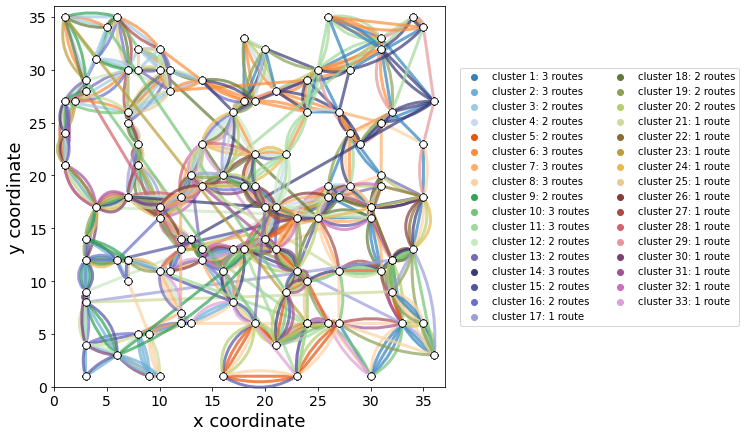

In [36]:
max_lat = df_nodes.lat.max()
max_lon = df_nodes.lon.max()

G = nx.from_pandas_edgelist(df_links, source='from',
                            target='to',
                            edge_attr=['travel_time'], create_using=nx.DiGraph)

stop_ls_layer = gpd.GeoDataFrame(
    df_nodes, geometry=gpd.points_from_xy(df_nodes.lat, df_nodes.lon))
stop_ls_layer.set_index('id', inplace=True)

pos_ori = {index: list(value.coords)[0] for index, value in
           stop_ls_layer.geometry.items()}
nx.set_node_attributes(G, pos_ori, 'coord')

fig, ax = plt.subplots(figsize=(7, 7))

G_path = nx.MultiGraph()
for i in range(coms_leiden.level.max() + 1):

    # get clusters of each layer
    each_coms_leiden = coms_leiden[coms_leiden.level == i]
    curr_route_path_df = route_path_df[route_path_df.level == str(i)]

    legend_colors = []
    for _, each_cluster_row in each_coms_leiden.iterrows():
        tmp_com_id = each_cluster_row.membership
        print('level {} cluster {} has {} nodes'.format(i, tmp_com_id,
                                                        len(each_cluster_row.community)))
        tmp_index = curr_route_path_df[
            (curr_route_path_df.com_id == str(tmp_com_id))].index
        curr_route_path_df.loc[tmp_index, 'color'] = [cmap(color_id)] * len(tmp_index)

        legend_colors.append(cmap(color_id))

        color_id += 1

    node_layer = nx.draw_networkx_nodes(G, pos=pos_ori, node_color="white", ax=ax,
                                        node_size=50, edgecolors="black",
                                        linewidths=.5)
    node_layer.set_zorder(10)

    # make empty plot with correct color and label for each group for legend plot
    tmp_com_id = 0
    for v in legend_colors:
        com_route_path_df = curr_route_path_df[
            curr_route_path_df.com_id == str(tmp_com_id)]
        if len(com_route_path_df) == 1:
            ax.scatter([], [], c=v, label='cluster {}: {} route'.format(com_id_viz,
                                                                        len(com_route_path_df)))
        else:
            ax.scatter([], [], c=v, label='cluster {}: {} routes'.format(com_id_viz,
                                                                         len(com_route_path_df)))
        com_id_viz += 1
        tmp_com_id += 1

    # draw path
    if len(curr_route_path_df) > 0:

        routes = curr_route_path_df.path.values
        path_colors = curr_route_path_df.color.values
        for l in range(len(routes)):
            r = routes[l]
            route_edges = [(r[n], r[n + 1]) for n in range(len(r) - 1)]
            G_path.add_nodes_from(r)
            G_path.add_edges_from([(each[0],each[1], {'color':path_colors[l]}) for each in route_edges])

nx.set_node_attributes(G_path, pos_ori, 'coord')
# path_colors = []
# for (u,v,attrib_dict) in list(G_path.edges.data()):
#     path_colors.append(attrib_dict['color'])

# in order to make the curve spread between two sides:
sb = [0,0,1,1,2,2,3,3,4,4,5,5]
for (u,v,d, attrib_dict) in list(G_path.edges.data(keys=True)):
    # odd and even repeated edges spread over the straight lines' two sides
    if (d % 2) == 0:
        d_viz = d - sb[d]
    else:
        d_viz = -(d - sb[d])

    ax.annotate("",
                xy=pos_ori[u], xycoords='data',
                xytext=pos_ori[v], textcoords='data',
                arrowprops=dict(arrowstyle="-", color=attrib_dict['color'],
                                shrinkA=5, shrinkB=5, alpha = 0.7, lw=3,
                                patchA=None, patchB=None,
                                # str(0.15 * d_viz) determine how curved the repeated edge is
                                connectionstyle="arc3,rad=rrr".replace('rrr',
                                                                       str(0.15 * d_viz)
                                                                       ),
                                ),
                )

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

ax.set_ylim(0, max_lon + 1)
ax.set_xlim(0, max_lat + 1)
ax.set_xlabel('x coordinate', fontsize=18)
ax.set_ylabel('y coordinate', fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# # Shrink current axis's height by 10% on the bottom
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# # Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=3)
# ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#           mode="expand", borderaxespad=0, ncol=3)
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0,ncol=2)

plt.savefig('./tmp_results/mumford3_scatter_total.svg')